In [ ]:
!sudo apt install tesseract-ocr -y
!sudo apt install libtesseract-dev -y
!sudo apt install poppler-utils -y

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 30 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libarchive-dev libleptonica-dev
The following NEW packages will be installed:
  libarchive-dev libleptonica-dev libtesseract-dev
0 upgraded, 3 newly installed, 0 to remove and 30 not upgraded.
Need to get 3,743 kB of archives.
After this operation, 16.0 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libarchive-dev amd64 3.6.0-1ubuntu1.3 [581 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libleptonica-dev amd64 1.82.0-3build1 [1,562 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libtesseract-dev amd64 4.1.1-2.1build1 [1,600 kB

In [ ]:
!pip install langchain unstructured unstructured[all-docs] pydantic lxml openai faiss-cpu tiktoken opencv-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 62.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.2/48.2 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 12.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 79.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.7/30.7 MB 66.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 70.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 97.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 100.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 23.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 472.8/472.8 kB 36.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.9/48.9 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [3]:
!pip install langchain-community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 27.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.2 MB/s eta 0:00:00


In [2]:
!pip install langchain_groq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.7/126.7 kB 4.3 MB/s eta 0:00:00


In [ ]:
import os
import uuid
import base64
from IPython import display
from unstructured.partition.pdf import partition_pdf
from langchain.chains import LLMChain
from langchain.prompts import PromptTemplate
from langchain.schema.messages import HumanMessage, SystemMessage
from langchain.schema.document import Document
from langchain.vectorstores import FAISS
from langchain.retrievers.multi_vector import MultiVectorRetriever

In [4]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
pdf_folder = root_dir + "pdfs_test/"

Mounted at /content/gdrive


In [ ]:
output_path = "/content/gdrive/My Drive/pdfs_test/images"

In [ ]:
import logging
logging.getLogger("pdfminer").setLevel(logging.ERROR)



# Ensure output directory exists
from types import new_class
os.makedirs(output_path, exist_ok=True)

# List all PDF files in the folder
pdf_files = [f for f in os.listdir(pdf_folder) if f.endswith(".pdf")]

texts = []  # List to hold chunks from all PDFs

for pdf_file in pdf_files:
    pdf_path = os.path.join(pdf_folder, pdf_file)
    print(f"Processing: {pdf_file}")

    raw_pdf_elements = partition_pdf(
        filename=pdf_path,
        extract_images_in_pdf=True,
        infer_table_structure=True,
        chunking_strategy="by_title",
        max_characters=4000,
        new_after_n_chars=3800,
        combine_text_under_n_chars=2000,
        extract_image_block_output_dir=output_path,
    )
    texts.extend(raw_pdf_elements)  # Add chunks to the full list



Processing: 12325_2019_Article_1130.pdf


yolox_l0.05.onnx:   0%|          | 0.00/217M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.47k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/115M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/46.8M [00:00<?, ?B/s]

Processing: basal_cell_carcinoma_clinico_pathological_study_in.23.pdf
Processing: 10278_2024_Article_969.pdf
Processing: p339.pdf
Processing: BMRI2020-2073690.pdf
Processing: PIIS0959804923003568.pdf
Processing: main (1).pdf
Processing: cells-12-02737.pdf
Processing: 1-s2.0-S0956566324000484-main.pdf
Processing: 403_2024_Article_3107.pdf
Processing: 11912_2024_Article_1570.pdf
Processing: curroncol-28-00213.pdf
Processing: 40257_2024_Article_858.pdf
Processing: fon-17-1363.pdf
Processing: ijms-22-06305.pdf


In [ ]:
len(texts)

366

In [ ]:
from langchain.prompts import PromptTemplate
from langchain.chains import LLMChain
from langchain_groq import ChatGroq

llm = ChatGroq(model_name="meta-llama/llama-4-scout-17b-16e-instruct", api_key="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")

prompt = PromptTemplate.from_template(
    "Please summarize the following text:\n\n{text}\n\nSummary:"
)
chain = LLMChain(llm=llm, prompt=prompt)

text_summaries = []

for e in texts:
    if 'CompositeElement' in repr(e):
        text = e.text
        try:
            summary = chain.run(text=text)
            text_summaries.append(summary)
        except Exception as err:
            print(f"Error summarizing text: {err}")
            text_summaries.append("Error summarizing this text.")


In [ ]:
print(texts[2])


clinicians in other healthcare systems. We

Adv Ther (2020) 37:603–616

605

focused on the National Institute for Health and Care Excellence (NICE) guidelines, developed for use in England and Wales, to direct the discussion. We present melanoma and the ker- atinocyte carcinomas separately, except when their assessment and management can be con- sidered together.

This article is based on previously conducted studies and does not involve any new studies of human or animal subjects performed by any of the authors.

RISK FACTORS

Skin cancer incidence relates strongly to age, with age-speciﬁc incidence rates rising sharply from 50 years to peak in those over 75 years of age. In contrast to most other cancers, 25% of melanomas are diagnosed in those aged 50 and under [12]. The main risk factor for all skin cancers is preventable, namely exposure to ultraviolet (UV) radiation, with more than 80% of melanomas attributed to UV exposure [13, 14]. This includes not only long-term exposure but

In [ ]:
text_summaries[2]

'The article discusses the risk factors and prevention of skin cancer, specifically melanoma and keratinocyte carcinomas (KCs), based on the National Institute for Health and Care Excellence (NICE) guidelines in England and Wales. Key points include:\n\n1. **Risk factors**: Skin cancer incidence is strongly related to age, with a sharp increase in those over 75 years old. The main risk factor is preventable exposure to ultraviolet (UV) radiation, accounting for over 80% of melanomas.\n2. **Prevention**: Prevention focuses on patient education, tailoring advice to individual risk, and avoiding sun exposure. A systematic review found that tailored messages and relative risk reduction were effective strategies in improving health behavior outcomes.\n3. **Risk factors for melanoma**: Pale skin, family history of skin cancer, number of moles, immunodeficiency, and age (25% of melanomas are diagnosed in those aged 50 and under).\n4. **Risk factors for KCs**: Male gender, pale skin, red/blond

In [ ]:
import re

# Function to clean the text summaries
def clean_summary(summary):
    # Remove unwanted characters like newline (\n), asterisks (**), etc.
    cleaned_summary = summary.replace('\n', ' ')  # Replace newlines with a space
    cleaned_summary = cleaned_summary.replace('**', '')  # Remove asterisks
    # You can add more replace statements for other unwanted characters if needed
    # Or use regular expressions to clean further
    cleaned_summary = re.sub(r'[^\x00-\x7F]+', ' ', cleaned_summary)  # Remove non-ASCII characters
    return cleaned_summary.strip()  # Remove leading/trailing whitespaces

# Clean all summaries
cleaned_summaries = [clean_summary(summary) for summary in text_summaries]

# Print the cleaned summary of the 3rd chunk
print(cleaned_summaries[2])


The article discusses the risk factors and prevention of skin cancer, specifically melanoma and keratinocyte carcinomas (KCs), based on the National Institute for Health and Care Excellence (NICE) guidelines in England and Wales. Key points include:  1. Risk factors: Skin cancer incidence is strongly related to age, with a sharp increase in those over 75 years old. The main risk factor is preventable exposure to ultraviolet (UV) radiation, accounting for over 80% of melanomas. 2. Prevention: Prevention focuses on patient education, tailoring advice to individual risk, and avoiding sun exposure. A systematic review found that tailored messages and relative risk reduction were effective strategies in improving health behavior outcomes. 3. Risk factors for melanoma: Pale skin, family history of skin cancer, number of moles, immunodeficiency, and age (25% of melanomas are diagnosed in those aged 50 and under). 4. Risk factors for KCs: Male gender, pale skin, red/blonde hair, blue/green eye

In [ ]:
cleaned_summaries[2]

'The article discusses the risk factors and prevention of skin cancer, specifically melanoma and keratinocyte carcinomas (KCs), based on the National Institute for Health and Care Excellence (NICE) guidelines in England and Wales. Key points include:  1. Risk factors: Skin cancer incidence is strongly related to age, with a sharp increase in those over 75 years old. The main risk factor is preventable exposure to ultraviolet (UV) radiation, accounting for over 80% of melanomas. 2. Prevention: Prevention focuses on patient education, tailoring advice to individual risk, and avoiding sun exposure. A systematic review found that tailored messages and relative risk reduction were effective strategies in improving health behavior outcomes. 3. Risk factors for melanoma: Pale skin, family history of skin cancer, number of moles, immunodeficiency, and age (25% of melanomas are diagnosed in those aged 50 and under). 4. Risk factors for KCs: Male gender, pale skin, red/blonde hair, blue/green ey

In [ ]:
from transformers import LlavaForConditionalGeneration, AutoProcessor
from PIL import Image
import torch

# Load model and processor
model_id = "llava-hf/llava-1.5-7b-hf"

processor = AutoProcessor.from_pretrained(model_id)
model = LlavaForConditionalGeneration.from_pretrained(model_id, torch_dtype=torch.float16, low_cpu_mem_usage=True, device_map="auto")


processor_config.json:   0%|          | 0.00/173 [00:00<?, ?B/s]

chat_template.json:   0%|          | 0.00/701 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/505 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


tokenizer_config.json:   0%|          | 0.00/1.45k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/3.62M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/41.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/552 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/950 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/70.1k [00:00<?, ?B/s]

Fetching 3 files:   0%|          | 0/3 [00:00<?, ?it/s]

model-00003-of-00003.safetensors:   0%|          | 0.00/4.18G [00:00<?, ?B/s]

model-00001-of-00003.safetensors:   0%|          | 0.00/4.99G [00:00<?, ?B/s]

model-00002-of-00003.safetensors:   0%|          | 0.00/4.96G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/141 [00:00<?, ?B/s]

In [ ]:
def generate_llava_caption(image_path):
    image = Image.open(image_path).convert("RGB")

    prompt = "<|user|>\n<image>\nWhat is shown in this image?<|assistant|>"

    # Tokenize input
    inputs = processor(prompt, image, return_tensors="pt").to(model.device)

    # Generate output
    generate_ids = model.generate(**inputs, max_new_tokens=100)

    # Decode and clean up the output
    full_output = processor.decode(generate_ids[0], skip_special_tokens=True).strip()

    # Remove prompt from beginning if present
    if "<|user|>" in full_output:
        cleaned_output = full_output.split("<|assistant|>")[-1].strip()
    else:
        cleaned_output = full_output

    return cleaned_output

In [ ]:
import os

image_elements = []
image_summaries = []
for filename in os.listdir(output_path):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
        image_path = os.path.join(output_path, filename)
        image_elements.append(image_path)

        try:
            caption = generate_llava_caption(image_path)
        except Exception as e:
            caption = f"Error generating summary for {filename}: {e}"

        image_summaries.append(caption)

You may have used the wrong order for inputs. `images` should be passed before `text`. The `images` and `text` inputs will be swapped. This behavior will be deprecated in transformers v4.47.


In [ ]:
image_summaries[2]

"The image shows a series of four photographs of a person's skin, each with a different condition. The first photograph shows a mole on the person's skin, the second shows a scar, the third shows a wound, and the fourth shows a skin tag. The photographs are accompanied by a ruler, which is used to provide a sense of scale and perspective."

In [ ]:
import uuid
from langchain.schema.document import Document

# Create Documents and Vectorstore
documents = []
retrieve_contents = []

# Processing text elements and their summaries
for e, s in zip(text_summaries, cleaned_summaries):
    i = str(uuid.uuid4())  # Generate unique ID for each text document
    doc = Document(
        page_content=s,
        metadata={
            'id': i,
            'type': 'text',
            'original_content': e
        }
    )
    retrieve_contents.append((i, e))  # Store the original text with ID
    documents.append(doc)  # Append the Document

# Processing image elements and their summaries
for e, s in zip(image_elements, image_summaries):
    i = str(uuid.uuid4())  # Generate unique ID for each image document
    doc = Document(
        page_content=s,
        metadata={
            'id': i,
            'type': 'image',
            'original_content': e
        }
    )
    retrieve_contents.append((i, s))  # Store the summary with ID for image
    documents.append(doc)  # Append the Document

# At this point, 'documents' will contain the Document objects for both text and image, and 'retrieve_contents' will store the IDs and their original content.


In [6]:
!pip install faiss-cpu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.7/30.7 MB 56.0 MB/s eta 0:00:00


In [ ]:

from langchain.embeddings import HuggingFaceEmbeddings
from langchain.vectorstores import FAISS

embeddings = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2", model_kwargs={"device": "cpu"})
vectorstore = FAISS.from_documents(documents=documents, embedding=embeddings)
#docsearch = Chroma.from_documents(documents, embeddings)  # store the embedding in docsearch using Chromadb
print('document ingested')

document ingested


In [ ]:
vectorstore.save_local("/content/gdrive/My Drive/faiss_index")

In [ ]:
import logging
import base64
from PIL import Image
import io
from langchain.embeddings import HuggingFaceEmbeddings
from langchain.vectorstores import Chroma
from langchain.chains import LLMChain
from langchain.prompts import PromptTemplate
from langchain.prompts.chat import ChatPromptTemplate
from transformers import pipeline

# Set up the LLaVA pipeline
llava_llm = ChatGroq(model_name="llama-3.2-11b-vision-preview", api_key="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")
# model got depracated on April 14 so used the othr model and used in the below cells

# Function to encode image to base64
def image_to_base64(image_path):
    """Converts an image to base64 encoding"""
    with open(image_path, "rb") as img_file:
        return base64.b64encode(img_file.read()).decode("utf-8")

# Function to process the image and get base64 encoding
def process_image(image_path):
    """Processes the image to a base64 string."""
    return image_to_base64(image_path)

# Function to retrieve relevant documents from docsearch (you need to define docsearch)
def retrieve_relevant_docs(question):
    """Retrieve relevant documents using docsearch similarity search."""
    relevant_docs = vectorstore.similarity_search(question)

    # If no relevant documents are found, return None
    if not relevant_docs:
        return None

    return relevant_docs

# Define your answer function
def answer(question, image_path=None):
    # Retrieve relevant documents based on the question (using vectorstore similarity search)
    relevant_docs = retrieve_relevant_docs(question)

    # If no relevant documents are found, return a message
    if not relevant_docs:
        return "I could not find an answer to your question. I'm not sure about that.", []

    context = ""
    relevant_images = []

    # Build the context from text and images
    for d in relevant_docs[:3]:  # Limit the number of documents to 3 for brevity
        if d.metadata['type'] == 'text':
            context += '[text]' + d.metadata['original_content'] + '\n'
        elif d.metadata['type'] == 'image':
            context += '[image]' + d.page_content
            relevant_images.append(d.metadata['original_content'])

    # If an image is provided, process it and add to relevant images
    if image_path:
        image_base64 = process_image(image_path)
        relevant_images.append(image_base64)

    # If no context was built from the documents (only images provided), return a fallback answer
    if not context:
        return "No relevant text documents found. Please provide a different query.", []

    # Create a prompt template for the LLM chain
    prompt = ChatPromptTemplate.from_template(
        "Context: {text_input}\n\nQuestion: {question}\nAnswer the question: {question}. "
        "Describe the image: {image_input}"
    )

    # Initialize the LLMChain with the LLaVA model and the prompt template
    chain = LLMChain(llm=llava_llm, prompt=prompt)

    # Run the multimodal query with text and image context (image is optional)
    result = chain.run(image_input=relevant_docs, text_input=context, question=question)

    return result, relevant_images

# Suppress specific warnings from langsmith.client
logging.getLogger('langsmith.client').setLevel(logging.CRITICAL)

# Example usage: Provide a local file path to the image
image_path = "figure-8-6.jpg"  # Replace with actual file path
question = "What is melanoma?"

# Run the answer function with the test question
result, relevant_images = answer(question, image_path=image_path)
print(result)


**What is melanoma?**

Melanoma is a type of skin cancer that arises from the pigment-producing cells in the epidermis, the outermost layer of the skin. It is the most severe form of skin cancer, resulting from mutations in these cells, leading to uncontrolled cell growth and malignant tumor formation.

**Description of the image:**

Unfortunately, there is no image provided in the text or references.


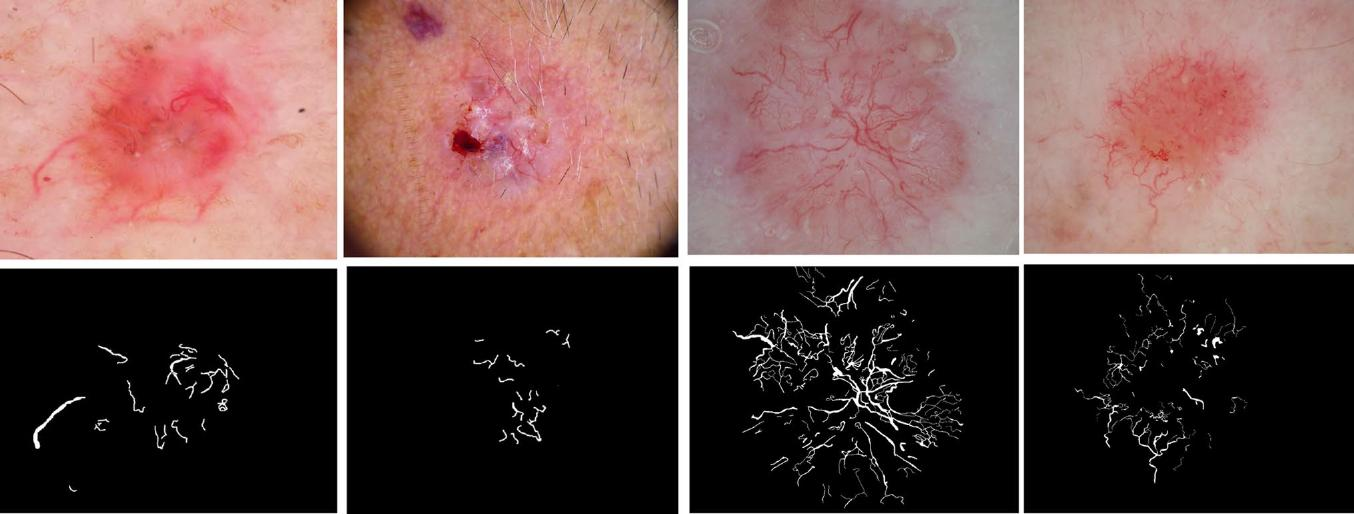

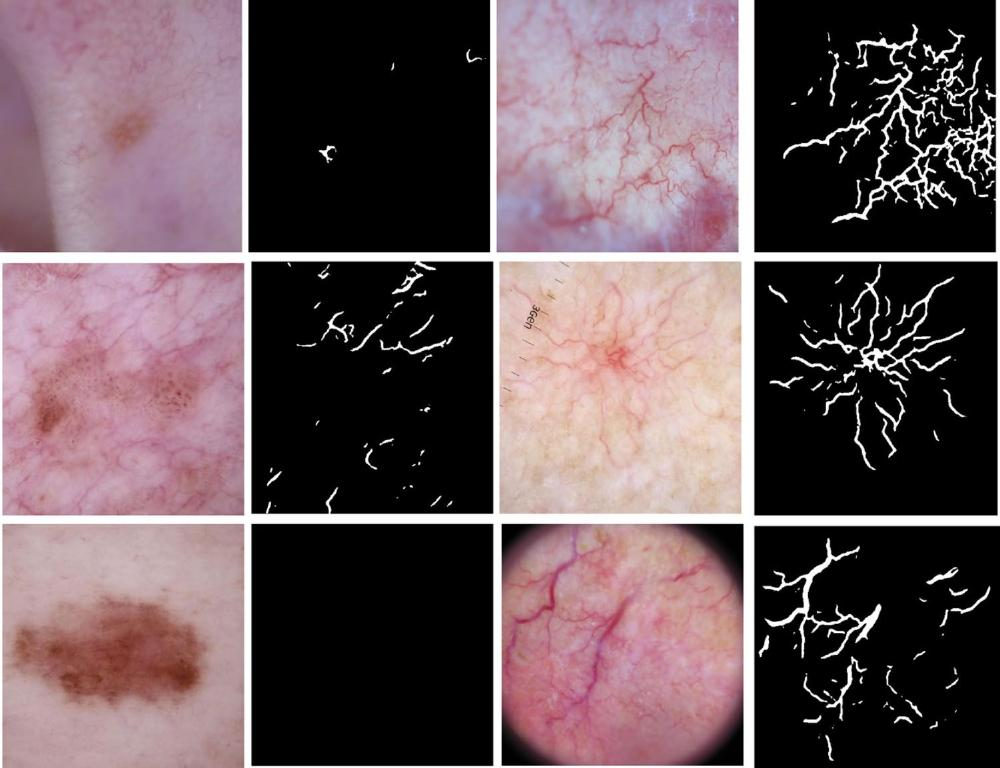

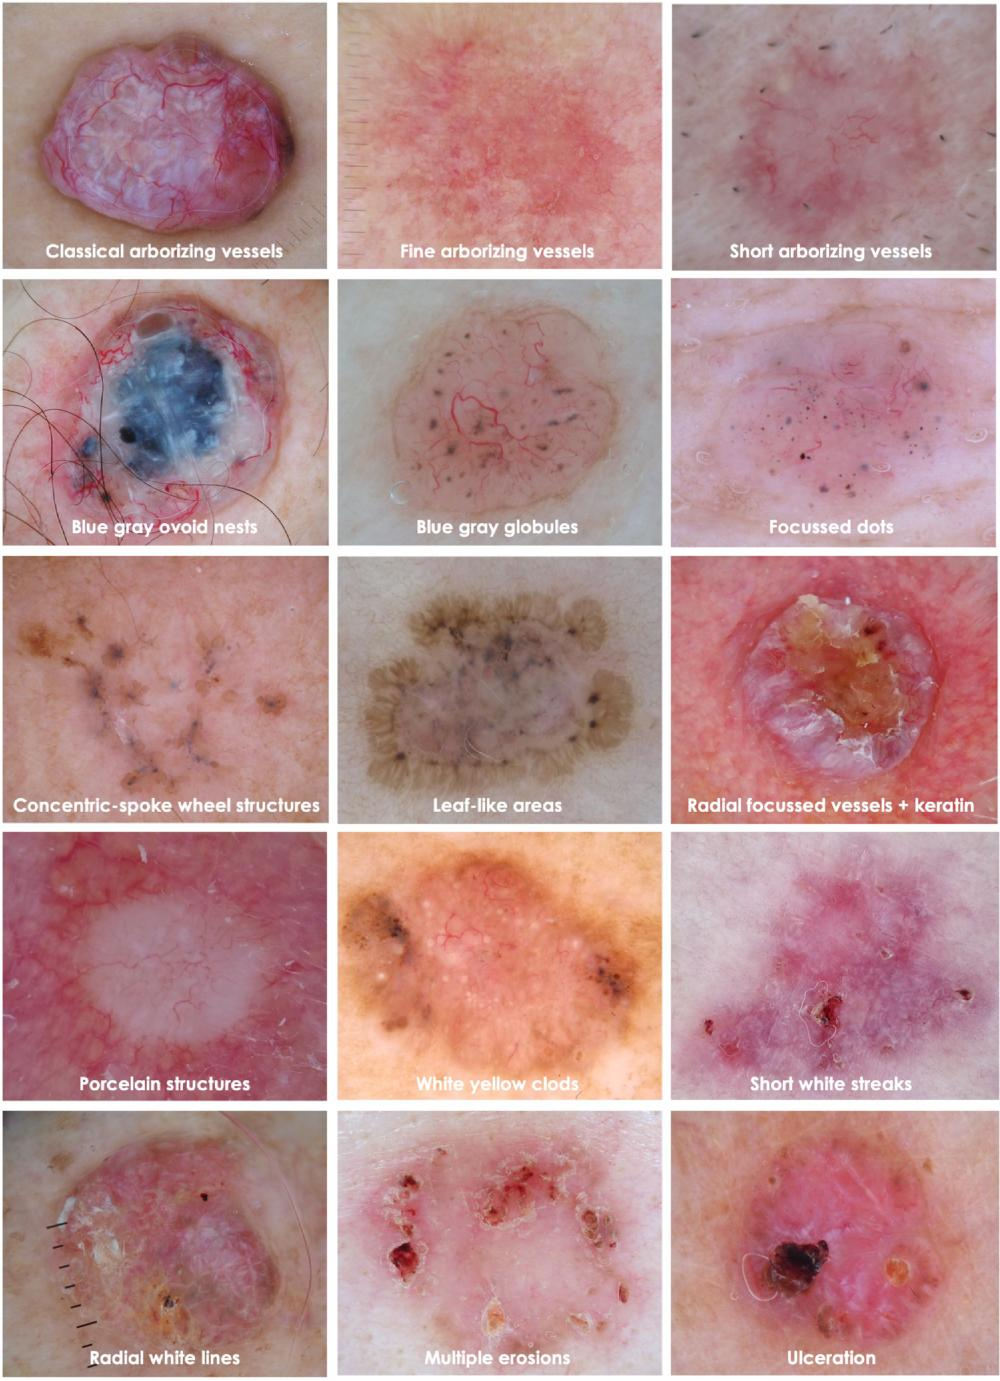

Error displaying image from /9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAWCBCgDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwDpw0zpgXMv/fZpjC6RgRdTf99miNtvAqfhsc156eh7SdhqyXIU5uZf++zUb3Fy3BuJcf75qUqQDzUZQ7c9qlsEl1Kssl1ji5mx/vms25a7zvS7nyO281rAA5BqvLByRxzU3Zdk9LHJajPf

In [ ]:
from PIL import Image
from IPython.display import display

def display_local_images(image_paths):
    """Display images from local file paths."""
    for path in image_paths:
        try:
            img = Image.open(path)  # Open image
            display(img)  # Display image in Jupyter Notebook

        except Exception as e:
            print(f"Error displaying image from {path}: {e}")

# Call function with your relevant images
display_local_images(relevant_images)

In [ ]:
import logging
import base64
from PIL import Image
import io
from langchain.embeddings import HuggingFaceEmbeddings
from langchain.vectorstores import FAISS
from langchain.chains import LLMChain
from langchain.prompts.chat import ChatPromptTemplate


# Set up the LLaVA model
llava_llm = ChatGroq(model_name="meta-llama/llama-4-scout-17b-16e-instruct", api_key="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")

# Convert image to base64
def image_to_base64(image_path):
    """Converts an image to base64 encoding"""
    with open(image_path, "rb") as img_file:
        return base64.b64encode(img_file.read()).decode("utf-8")

# Optional helper to process image
def process_image(image_path):
    return image_to_base64(image_path)

# Retrieve top K documents using FAISS
def retrieve_relevant_docs(question, k=4):
    """Retrieve relevant documents using FAISS similarity search."""
    return vectorstore.similarity_search(question, k=k)

# Main answer function
def answer(question, image_path=None):
    # Step 1: Retrieve documents
    relevant_docs = retrieve_relevant_docs(question)

    if not relevant_docs:
        return "I could not find an answer to your question. I'm not sure about that.", []

    context = ""
    relevant_images = []

    # Step 2: Build context and gather images from docs
    for doc in relevant_docs[:3]:
        doc_type = doc.metadata.get('type', 'text')
        if doc_type == 'text':
            context += '[text]' + doc.metadata.get('original_content', '') + '\n'
        elif doc_type == 'image':
            context += '[image]' + doc.page_content
            relevant_images.append(doc.metadata.get('original_content', ''))

    # Step 3: Include user-provided image (if any)
    image_base64 = process_image(image_path) if image_path else ""
    if image_base64:
        relevant_images.append(image_base64)

    if not context:
        return "No relevant text documents found. Please provide a different query.", []

    # Step 4: Prepare the prompt
    prompt = ChatPromptTemplate.from_template(
    "You are a helpful assistant that can understand and describe both text and images related to skin related disease only.\n\n"
    "Context from documents:\n{text_input}\n\n"
    "Question: {question}\n\n"
    "Based on the image and the text context, answer the question accurately. "
    "If you are unsure or the image or question is unclear, simply say 'I don't know'. "
    "Do not make guesses or speculative statements."
)


    # Step 5: Run LLMChain
    chain = LLMChain(llm=llava_llm, prompt=prompt)
    result = chain.run(image_input=image_base64, text_input=context, question=question)

    return result, relevant_images

# Suppress logging from langsmith
logging.getLogger('langsmith.client').setLevel(logging.CRITICAL)

# Example usage
image_path = "figure-10-5.jpg"  # Provide actual image path or set to None
question = "what is melanoma?"
result, images = answer(question, image_path=image_path)
print(result)


In [ ]:
from PIL import Image
from IPython.display import display

def display_local_images(image_paths):
    """Display images from local file paths."""
    for path in image_paths:
        try:
            img = Image.open(path)  # Open image
            display(img)  # Display image in Jupyter Notebook

        except Exception as e:
            print(f"Error displaying image from {path}: {e}")

# Call function with your relevant images
display_local_images(relevant_images)

# FINAL WORKING CODE FOR DEPLOYMENT

In [7]:
from langchain.vectorstores import FAISS
from langchain.embeddings import HuggingFaceEmbeddings

# Recreate the embedding function (use the same model name as before)
embedding_function = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")  # example

# Load the FAISS vectorstore with the security override
vectorstore = FAISS.load_local(
    "/content/gdrive/My Drive/faiss_index",
    embeddings=embedding_function,
    allow_dangerous_deserialization=True
)


In [8]:
retriever = vectorstore.as_retriever()

In [9]:
from transformers import BlipProcessor, BlipForConditionalGeneration

processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

def get_image_caption(image_path):
    image = Image.open(image_path).convert("RGB")
    inputs = processor(image, return_tensors="pt")
    output = model.generate(**inputs)
    caption = processor.decode(output[0], skip_special_tokens=True)
    return caption


Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


preprocessor_config.json:   0%|          | 0.00/287 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/506 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/990M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/990M [00:00<?, ?B/s]

In [11]:
from langchain.prompts import PromptTemplate
from langchain.chains import LLMChain
from langchain_groq import ChatGroq
vision_llm = ChatGroq(
    model_name="meta-llama/llama-4-scout-17b-16e-instruct",
    api_key="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" # the groq api key aand its not charging, it's free
)



In [12]:
from langchain.prompts import ChatPromptTemplate
from langchain.chains import LLMChain
from langchain_groq import ChatGroq
import logging

def multimodal_query_with_groq(text_input: str, image_path: str = None):
    # Step 1: Handle optional image
    if image_path:
        try:
            image_caption = get_image_caption(image_path)
        except Exception as e:
            logging.warning(f"Image processing failed: {e}")
            image_caption = "No image provided or image processing failed."
    else:
        image_caption = "No image provided."

    # Step 2: Create search query from available data
    combined_query = f"{text_input}\nImage says: {image_caption}" if image_path else text_input

    # Step 3: Search in vectorstore
    retrieved_docs = vectorstore.similarity_search(combined_query, k=5)

    # Step 4: Prepare context and extract relevant images
    doc_texts = []
    relevant_images = []

    for doc in retrieved_docs:
        doc_texts.append(doc.page_content)
        if doc.metadata.get("type") == "image":
            image_reference = doc.metadata.get("original_content")
            if image_reference:
                relevant_images.append(image_reference)

    docs_combined = "\n".join(doc_texts)

    # Step 5: Prompt template
    prompt = ChatPromptTemplate.from_template(
    "You are an expert assistant trained to analyze dermatological cases using image analysis and reference documents.\n\n"
    "Context:\n"
    "- Image Description: {image_caption}\n"
    "- Retrieved Medical Documents:\n{retrieved_docs}\n\n"
    "Based on the image and supporting documents, provide a clear and informative answer to the question below. "
    "If the skin condition is recognizable based on the image and references, describe it confidently and provide a relevant treatment plan. "
    "If the question is not related to skin conditions or cannot be answered using the given information, respond with:\n"
    "'I don’t have enough information to answer that.'\n\n"
    "Question:\n{question}\n\n"
    "Answer:"
)


    # Step 6: Run chain
    chain = LLMChain(llm=vision_llm, prompt=prompt)

    result = chain.run(
        image_caption=image_caption.strip(),
        retrieved_docs=docs_combined.strip(),
        question=text_input.strip()
    )

    return result.strip(), relevant_images


In [14]:
from IPython.display import Image, display
from PIL import Image

image_path = "melanoma.jpg"
question = "What skin cancer in the input image looks like? If yes, than what are the possible treatments"

result, relevant_images = multimodal_query_with_groq(question, image_path=image_path)
print("Answer:", result)
print("Relevant Images:", relevant_images)


Answer: Based on the image description and the retrieved medical documents, it appears that the skin condition depicted on the person's back could be a type of skin cancer. 

The image description mentions a "large, dark skin on their back," which could be indicative of a pigmented skin lesion. The medical documents mention melanoma, a type of skin cancer that can present as a pigmented mole, and non-melanoma skin cancer (NMSC), which includes basal cell carcinoma and squamous cell carcinoma.

Given the description of the skin lesion as "brown, hairy, and possibly cancerous growth," one possible diagnosis could be a pigmented skin cancer, such as melanoma or a pigmented basal cell carcinoma. However, without more specific information about the lesion's morphology, histopathology, or other diagnostic details, it's challenging to provide a definitive diagnosis.

Assuming the skin condition is a type of skin cancer, possible treatments could include:

1. Surgical excision: A surgical proc

Answer: Based on the image description and the retrieved medical documents, it appears that the skin condition depicted on the person's back could be a type of skin cancer. 

The image description mentions a "large, dark skin on their back," which could be indicative of a pigmented skin lesion. The medical documents mention melanoma, a type of skin cancer that can present as a pigmented mole, and non-melanoma skin cancer (NMSC), which includes basal cell carcinoma and squamous cell carcinoma.

Given the description of the skin lesion as "brown, hairy, and possibly cancerous growth," one possible diagnosis could be a pigmented skin cancer, such as melanoma or a pigmented basal cell carcinoma. However, without more specific information about the lesion's morphology, histopathology, or other diagnostic details, it's challenging to provide a definitive diagnosis.

Assuming the skin condition is a type of skin cancer, possible treatments could include:

1. Surgical excision: A surgical proc

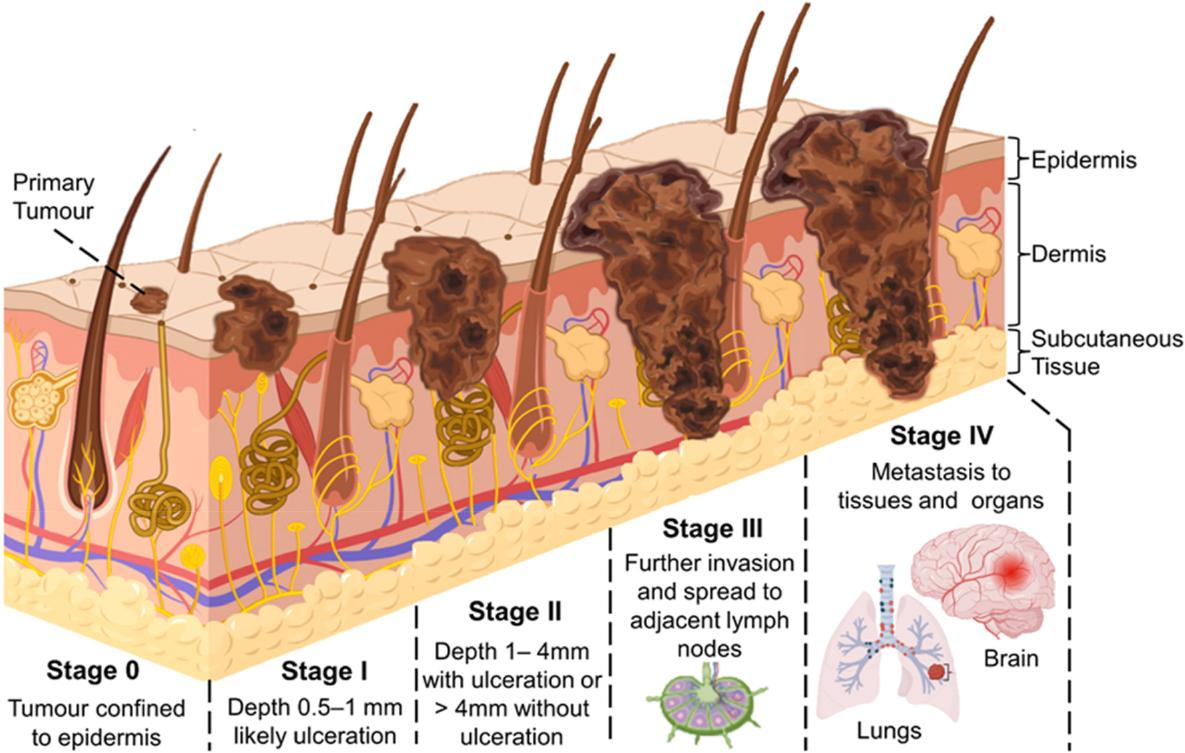

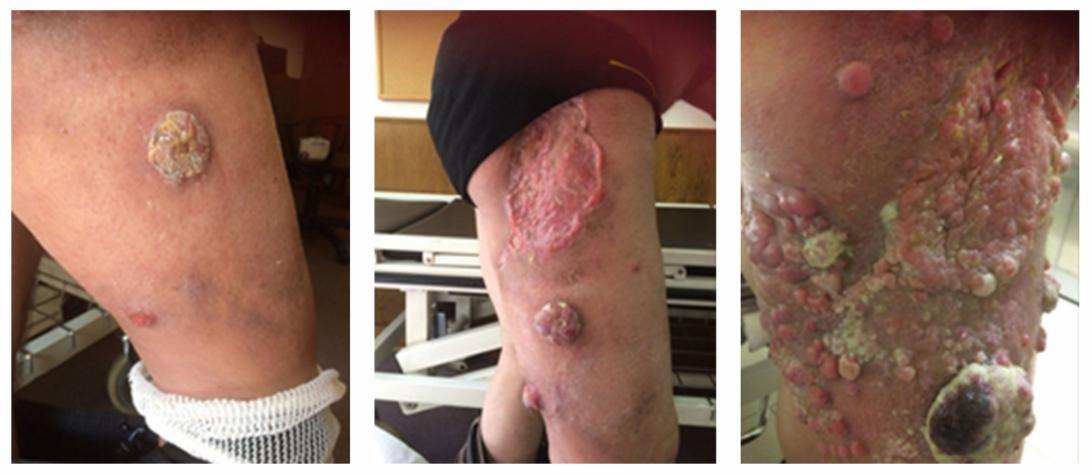

In [17]:
from IPython.display import Image, display

# Print the LLM-generated answer
print("Answer:", result)

# Display relevant images (make sure they're local or accessible)
print("Relevant Images:")
for img_path in relevant_images:
    display(Image(filename=img_path))


In [18]:
from IPython.display import Image, display
from PIL import Image

image_path = "melanoma.jpg"
question = "Where is a sephora store nearby me"

result, relevant_images = multimodal_query_with_groq(question, image_path=None)
print("Answer:", result)
print("Relevant Images:", relevant_images)

Answer: I don’t have enough information to answer that.
Relevant Images: ['/content/gdrive/My Drive/pdfs_test/images/figure-5-9.jpg']


In [19]:
from IPython.display import Image, display
from PIL import Image

image_path = "figure-5-3.jpg"
question = "What is there in this input image"

result, relevant_images = multimodal_query_with_groq(question, image_path=image_path)
print("Answer:", result)
print("Relevant Images:", relevant_images)

Answer: Based on the provided image descriptions and retrieved medical documents, I can confidently state that:

The input image shows a person's skin with a small scar.

The scar appears to be a surgical scar, located on the side of the person's head. There is no indication of any other skin conditions, such as a skin infection, blood clot, mole, wound, skin tag, or pus-filled bump, in the primary description of the image.

Therefore, the answer to the question is: A small scar, likely a surgical scar, on the side of a person's head. 

No specific treatment plan is required for a scar, but if there's concern about the scar or associated symptoms, a dermatological evaluation is recommended. 

If you have any further questions or need more information, feel free to ask!
Relevant Images: ['/content/gdrive/My Drive/pdfs_test/images/figure-2-7.jpg', '/content/gdrive/My Drive/pdfs_test/images/figure-2-2.jpg', '/content/gdrive/My Drive/pdfs_test/images/figure-5-3.jpg', '/content/gdrive/My Dr

Answer: Based on the image description and the retrieved medical documents, I can confidently say that the input image shows a person's skin with a small scar. The scar appears to be located on the side of their head, and it is described as a surgical scar. 

The image likely shows a close-up view of the scar, which is small in size. Given that it is described as a surgical scar, it is likely that the scar is a result of a previous surgical procedure.

I don’t have enough information to provide a treatment plan, but I can describe what is present in the image. 

There is a small surgical scar on the person's skin, likely on the side of their head.
Relevant Images: ['/content/gdrive/My Drive/pdfs_test/images/figure-2-7.jpg', '/content/gdrive/My Drive/pdfs_test/images/figure-2-2.jpg', '/content/gdrive/My Drive/pdfs_test/images/figure-5-3.jpg', '/content/gdrive/My Drive/pdfs_test/images/figure-3-2.jpg', '/content/gdrive/My Drive/pdfs_test/images/figure-27-13.jpg']


Answer: Based on the image description and the retrieved medical documents, I can confidently say that the input image shows a person's skin with a small scar. The scar appears to be located on the side of their head, and it is described as a surgical scar. 

The image likely shows a close-up view of the scar, which is small in size. Given that it is described as a surgical scar, it is likely that the scar is a result of a previous surgical procedure.

I don’t have enough information to provide a treatment plan, but I can describe what is present in the image. 

There is a small surgical scar on the person's skin, likely on the side of their head.
Relevant Images:


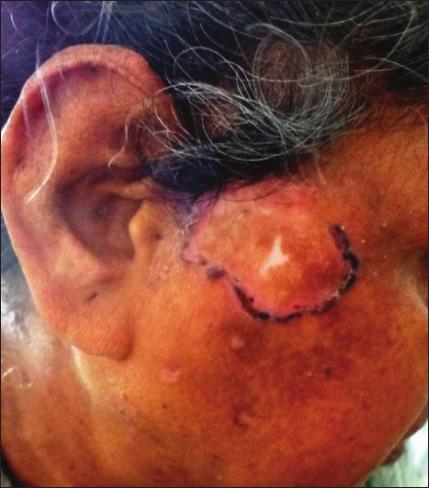

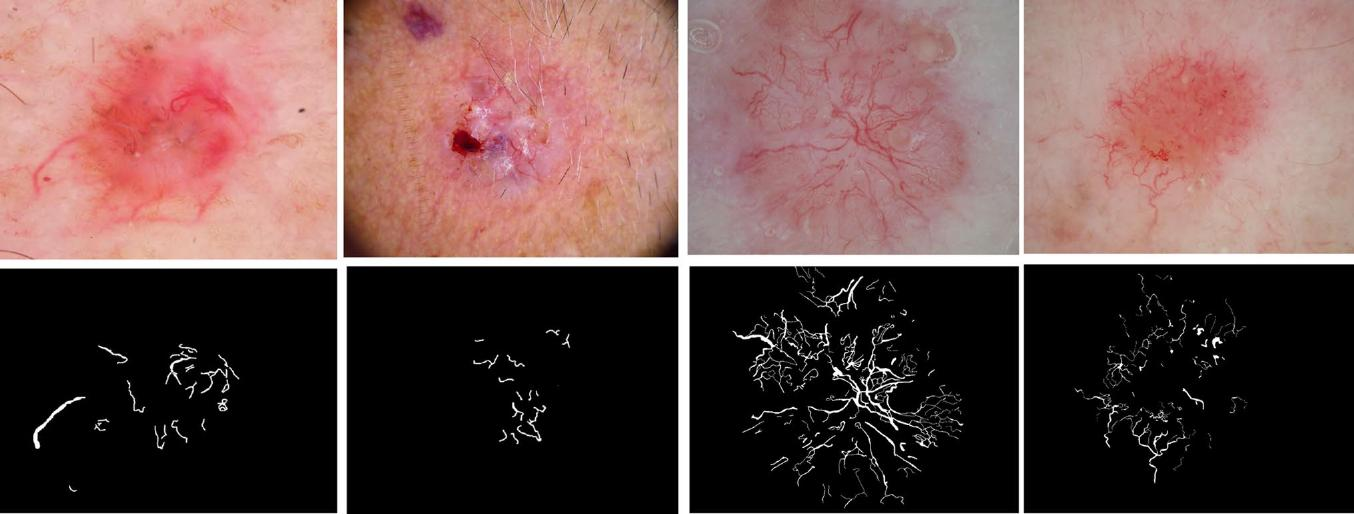

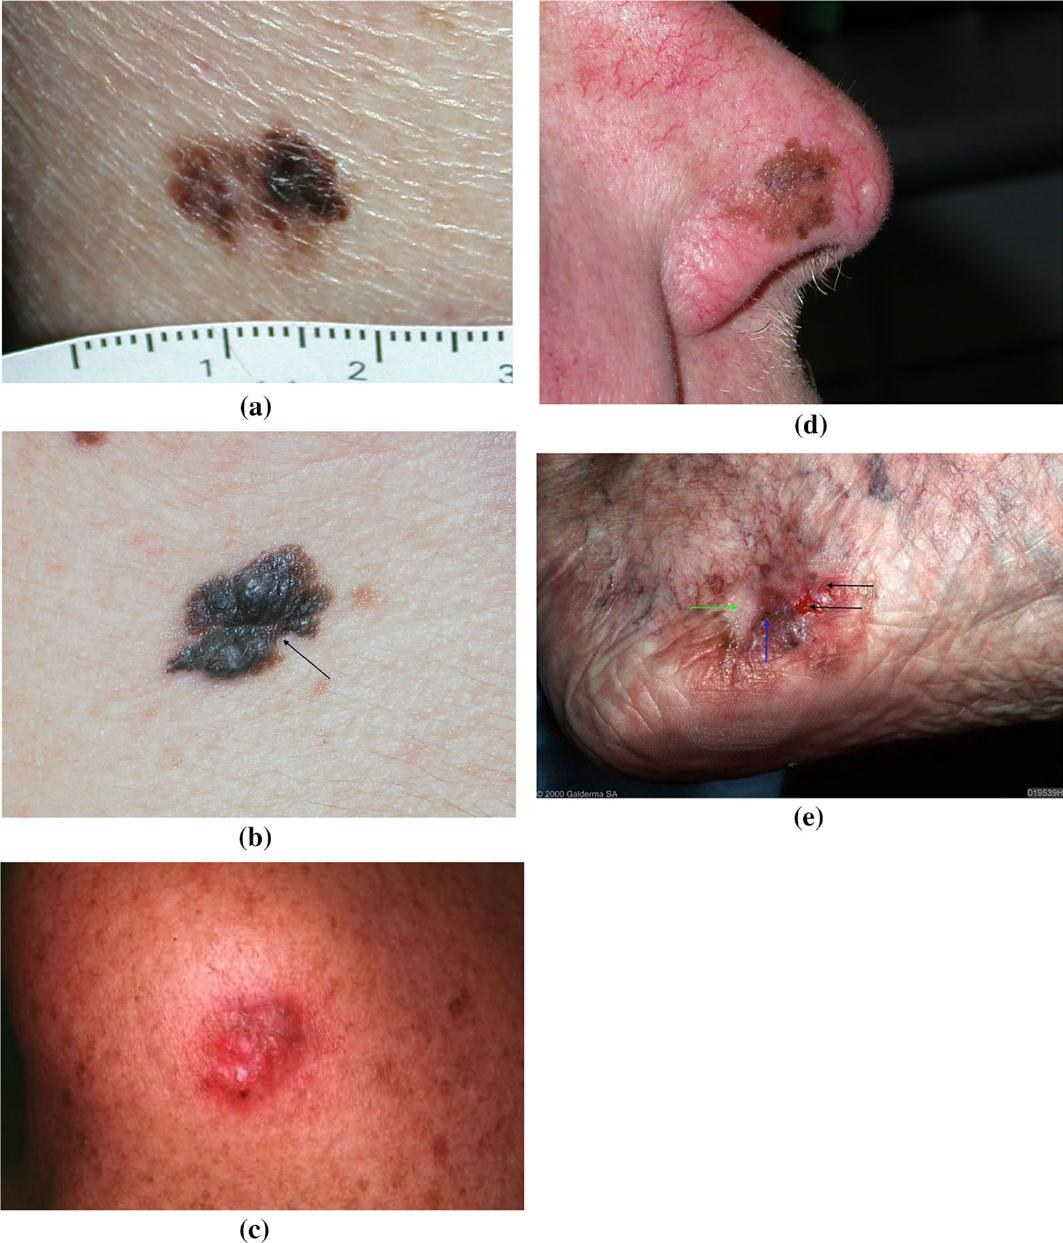

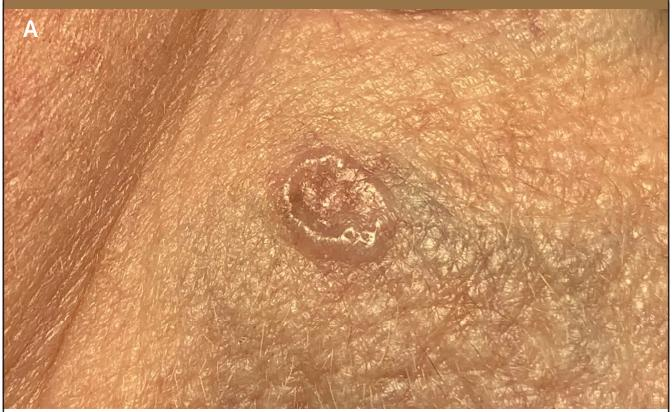

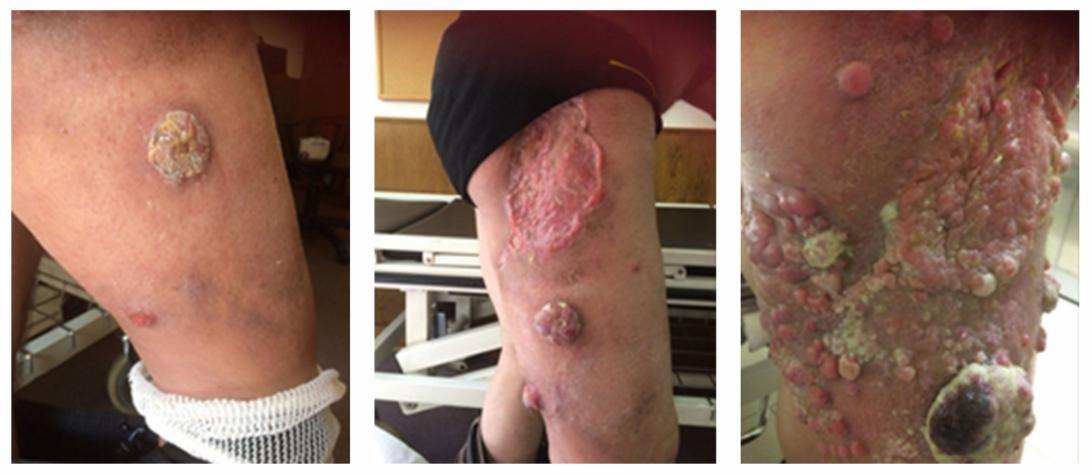

In [21]:
from IPython.display import Image, display


print("Answer:", result)

# Display relevant images (make sure they're local or accessible)
print("Relevant Images:")
for img_path in relevant_images:
    display(Image(filename=img_path))
